## Description of Deep Leaning baseline and used methods

As Deep Learning model we used BERT. We have trained the model using labeled data and measured the performance of the model using the following metrics:
* Accuracy
* Recall,
* Precision
* F1 Score

Before training the model, we have normalized and tokenized the data.
1. Normalization and tokenization: Cleaning and tokenizing the narratives, so that the model can be trained.
2. Label mapping: Creating a mapping between all unique class labels and integers to meet BERTs' requirements for training

For the models training and testing, we used a 80% training / 20% testing split.
By splitting the narratives, we followed different approaches to be able to evaluate the differences between them:
* Handling both, Ukraine War and Climate Change narratives in one dataframe, so that the model could learn from all the data
* Splitting narratives into two dataframes, containing only Ukraine War narratives or only Climate Change narratives each
* Using stratification to improve the distribution of classes between training and testing sets.

# Analysis

When the narratives were split by topic, the metrics for Climate Change improved, while the metrics for the Ukraine War worsened.
Having all metrics of 0.5135 during the approach with all dataframes at the same time, it is a moderate performance.

After that, we used only Climate Change narratives and all resulting metrics got much better: 0.7143.
Using only Ukraine War narratives, we received 0.4167 for all metrics, which is the worst result, although it is the topic with the highest amount of narratives that we had for training.

### Analyzing single classes

To be able to analyze differences in prediction of different classes, we analyzed the confusion matrices for each class individually.

For both topics, we received a similar distribution for the confusion matrix of the class *Other*. Again for both topics, the model predicted class "Other" correctly as positive. It also predicted other classes to be from class *Other*.

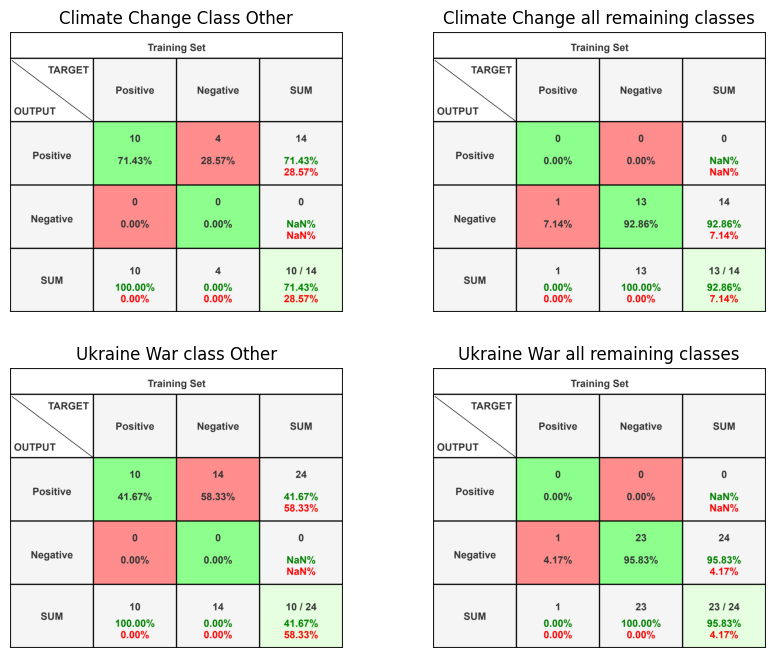

In [14]:
import matplotlib.pyplot as plt

images = ['cc_other.png', 'cc_all.png', 'ua_other.png', 'ua_all.png']
labels = ['Climate Change Class Other', 'Climate Change all remaining classes', 'Ukraine War class Other', 'Ukraine War all remaining classes']
img_base_path = '../../info/screens/'
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, (img_name, label) in enumerate(zip(images, labels)):
    row = i // 2
    col = i % 2
    img_path = img_base_path + '/' + img_name
    img = plt.imread(img_path)
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(label)
plt.show()

#### Climate Change

For Climate Change narratives, we received for class *Other* the following Confusion Matrix:
[[0, 4], [0, 10]]

Calculating the metrics for this specific class:
* Accuracy: 71,43 %
* Precision: 71,43 %
* Recall: 100%
* F1 Score: 83,33 %

For all other classes, we received the following equal Confusion Matrix:
[[13, 0], [1, 0]]
* Accuracy: 92,86 %
* Precision: 0 %
* Recall: 0%
* F1 Score: 0 %


#### Ukraine War

For Ukraine War narratives, we received for class *Other* the following Confusion Matrix:
[[0, 14], [0, 10]]

Calculating the metrics for this specific class:
* Accuracy: 41,7 %
* Precision: 41,7 %
* Recall: 100%
* F1 Score: 58,8%

For all other classes, we received the following equal Confusion Matrix:
[[23, 0], [1, 0]]
* Accuracy: 95,8%
* Precision: 0%
* Recall: 0%
* F1 Score: 0%


For both approaches, we can see that all classes except of *Other* have no counts for *True Positives*, but a very high count for *True Negatives*. On the hand, we have the class *Other*, where all samples of class *Other* are classified correctly as *Other*, but still we have almost as many or even more narratives that were classified as *Other*, although they had a different class.

From those unequally distributed results we see that BERTs' prediction performance is best for class *Other* and no other class.

An issue that could cause that, can be a data imbalance. The class *Other* occurs most frequently in the dataset. From that, the model could have learned to predict especially this class mostly accurately, while it fails for all other classes.

## Possible solutions
Although we have used stratification to receive a better distribution of all classes, there are still some solutions that we should consider in the next part.

Apperently, the class *Other* is overrepresented in the data set. Since we only had less than 200 narratives available, one possible solution to improve the predictions is to use more data.
In the context of this task we also have narratives in other languages available that we can use to handle the imbalance.Having more data.

The issue could also be that  the class labeling was not carried out cleanly, so that we have the broad class *Other*, where most of the narratives belong to. Specifying the classes more accurate could help to balance the dataset.





## Qualitative Analysis

While finishing up our project, we accidentally deleted one of the result runs from our BERT model. Because of this, we can’t reproduce the predictions the model originally made, which were the basis for this qualitative analysis.

This notebook contains our qualitative analysis, and all the outputs are already included in the markdown and code cells exactly as they were when we first ran it. Thus, rerunning the notebook is not possible!

Since we had the freedom to choose the format for this analysis, we think this shouldn’t be a big issue as long as the outputs are left as they are.

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from trainer import train_bert, prepare_data
from model import predict
from tqdm import tqdm
base_path = os.path.dirname(os.path.abspath(os.getcwd()))
label_directory = os.path.join(base_path, "models", "bert_20250113", "label_mapping.json")
input_file_full = os.path.join(base_path, "predicted_dataframe.csv")
dataset = pd.read_csv(input_file_full)

In [72]:
texts, labels, label_mapping = prepare_data(dataset)
print(f"Sample text: {texts[:3]}")
print(f"Sample label: {labels[:3]}")

training_results = train_bert(dataset, base_path)
print(f"Training Results: {training_results}")

Sample text: ["['bill', 'gate', 'say', 'solution', 'climate', 'change', 'ok', 'four', 'private', 'jet', 'bill', 'gate', 'right', 'fly', 'around', 'world', 'private', 'jet', 'normal', 'person', 'force', 'live', 'minute', 'city', 'without', 'freedom', 'travel', 'accord', 'bill', 'gate', 'tell', 'bbc', 'much', 'anybody', 'else', 'fight', 'climate', 'change', 'gate', 'claim', 'continue', 'spend', 'billion', 'dollar', 'climate', 'change', 'activism', 'carbon', 'footprint', 'issue', 'sign', 'get', 'unfiltered', 'news', 'deliver', 'straight', 'inbox', 'unsubscribe', 'time', 'subscribing', 'agree', 'term', 'use', 'stay', 'home', 'come', 'kenya', 'learn', 'farming', 'malaria', 'gate', 'say', 'interview', 'amol', 'rajan', 'comfortable', 'idea', 'part', 'problem', 'pay', 'offset', 'also', 'billion', 'breakthrough', 'energy', 'group', 'spending', 'part', 'solution', 'gate', 'add', 'watch', 'early', 'year', 'gate', 'fly', 'around', 'australia', 'board', 'million', 'dollar', 'luxury', 'private', 'je

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss



KeyboardInterrupt



In [5]:
tqdm.pandas()
model_path = os.path.join(base_path, "models/bert_20250113")

# Preparing predictions
def classify_row(row):
    try:
        predicted_label, _ = predict(row['tokens_normalized'], model_path)
        return predicted_label
    except Exception as e:
        print(f"Error for row {row.name}: {e}")
        return None

# Predicting
dataset['predicted_narrative'] = dataset.progress_apply(classify_row, axis=1)
dataset.to_csv(os.path.join(base_path, "predicted_dataframe.csv"), index=False)

100%|██████████| 519/519 [06:24<00:00,  1.35it/s]


                                             content  \
0  Bill Gates Says He Is ‘The Solution’ To Climat...   
1  Collaborative plans, innovation keys to circul...   
2  New paper makes ‘increasing tropical cyclone f...   
3  Climate Crazies Fail in Attempt to Vandalize A...   
4  “There is so much fallout:” Locals challenge w...   

                        narrative_subnarrative_pairs  \
0  [{'narrative': 'Criticism of climate movement'...   
1  [{'narrative': 'Other', 'subnarrative': 'Other'}]   
2  [{'narrative': 'Questioning the measurements a...   
3  [{'narrative': 'Criticism of climate movement'...   
4  [{'narrative': 'Other', 'subnarrative': 'Other'}]   

                               predicted_narrative  
0  {'narrative': 'Other', 'subnarrative': 'Other'}  
1  {'narrative': 'Other', 'subnarrative': 'Other'}  
2  {'narrative': 'Other', 'subnarrative': 'Other'}  
3  {'narrative': 'Other', 'subnarrative': 'Other'}  
4  {'narrative': 'Other', 'subnarrative': 'Other'}  


Here, we will pick one class label and analyze why some articles are getting predicted and especially why most of
the news articles that are actually assigned to that class are not predicted to be in this class.

We will again choose one class for qualitative analysis which has at least one *True Positive* and some *False Negatives* in English and Russian both, that we can compare with each other.

### English

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

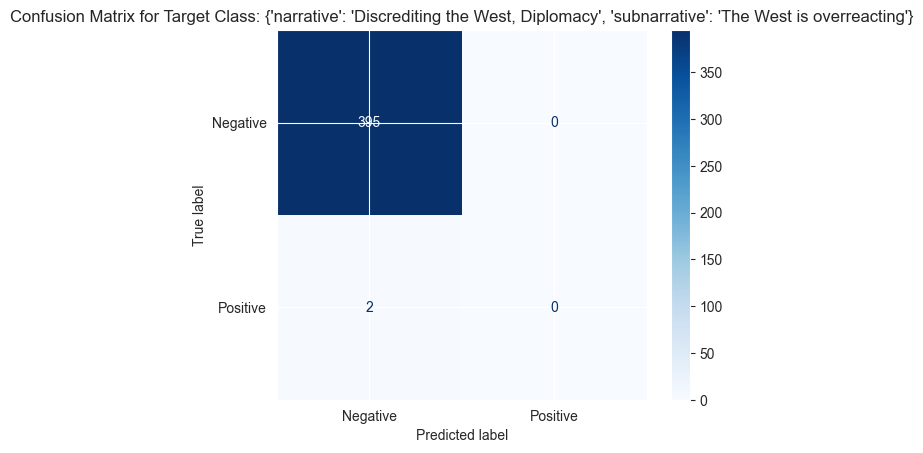

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

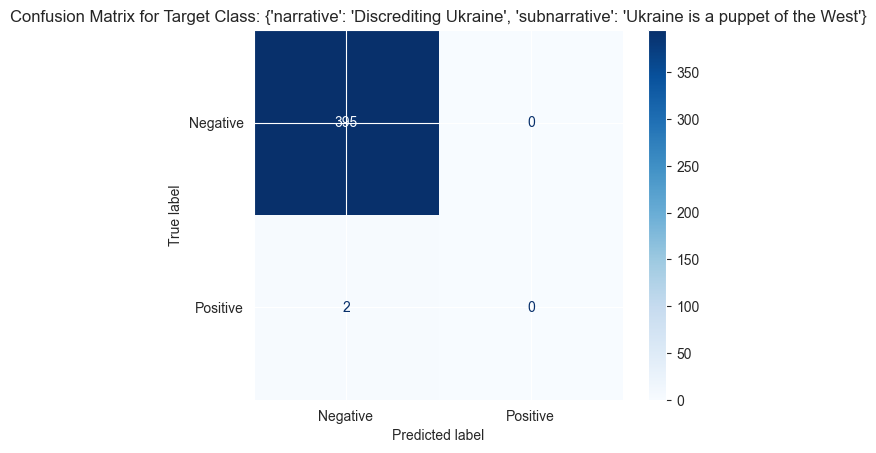

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

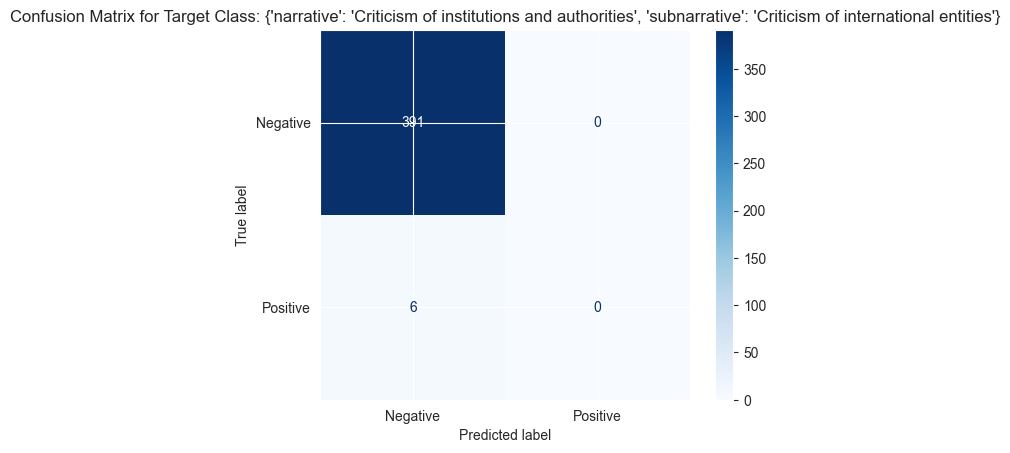

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

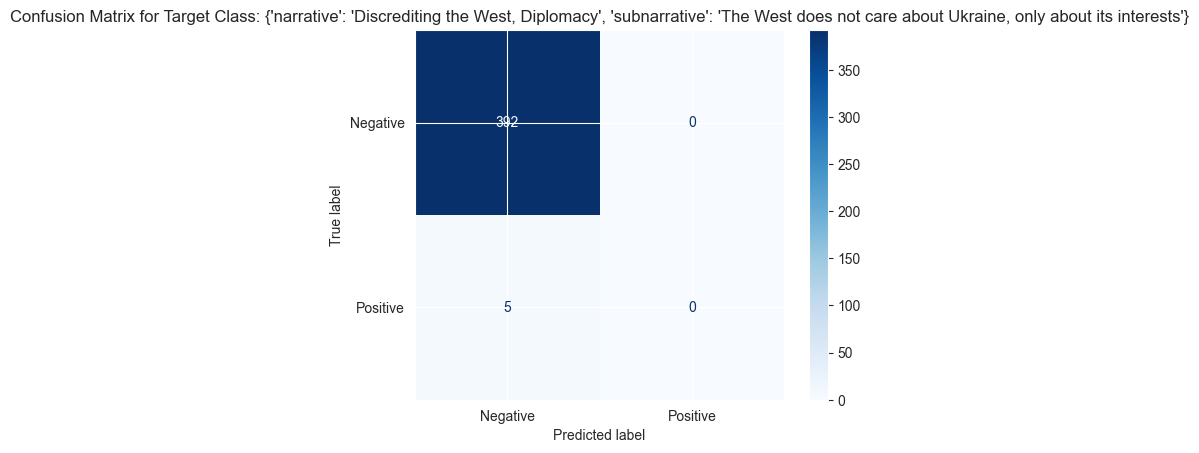

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

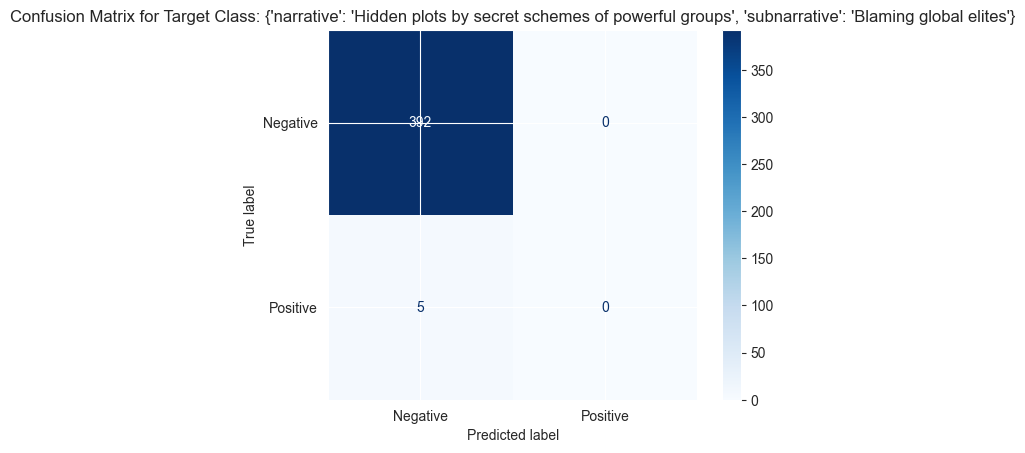

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

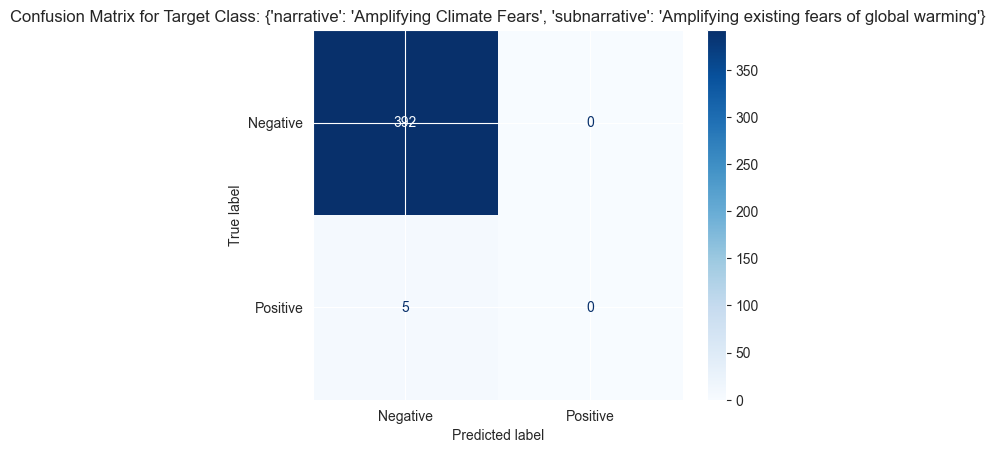

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

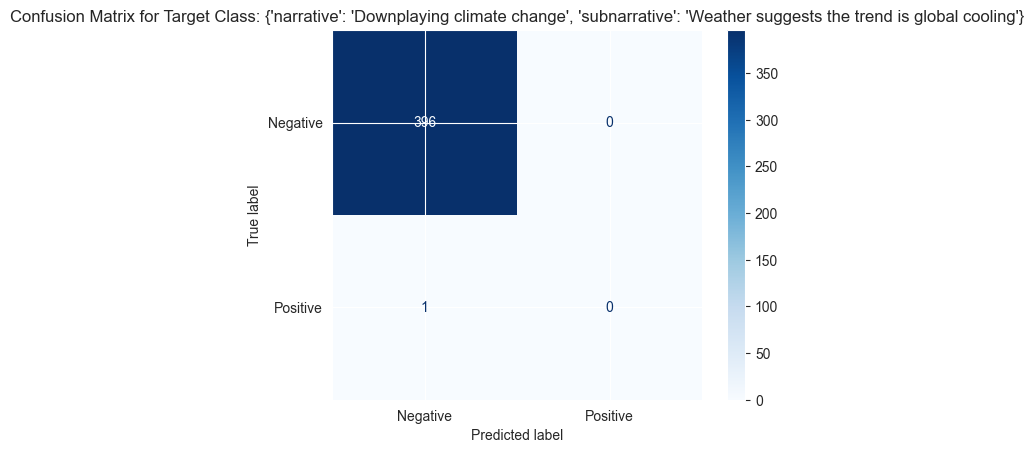

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

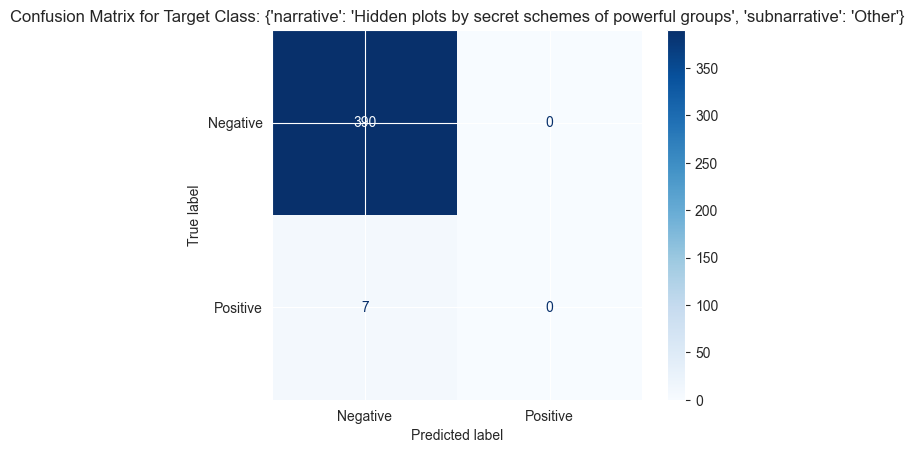

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

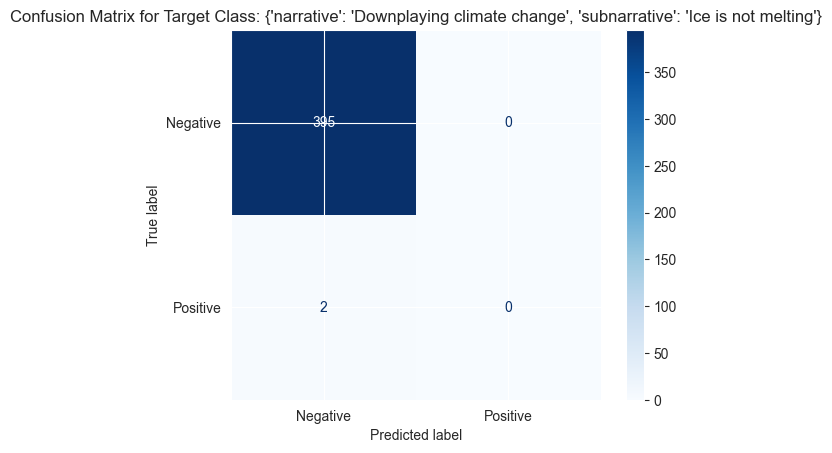

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

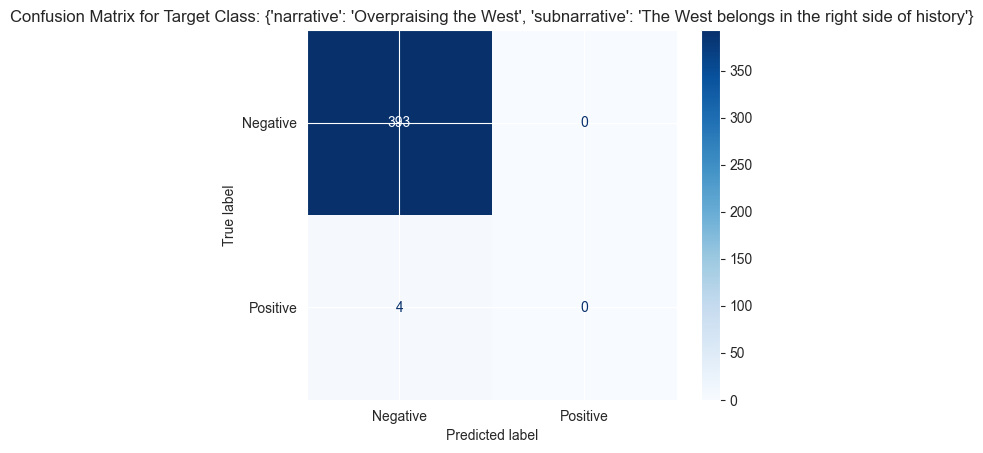

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

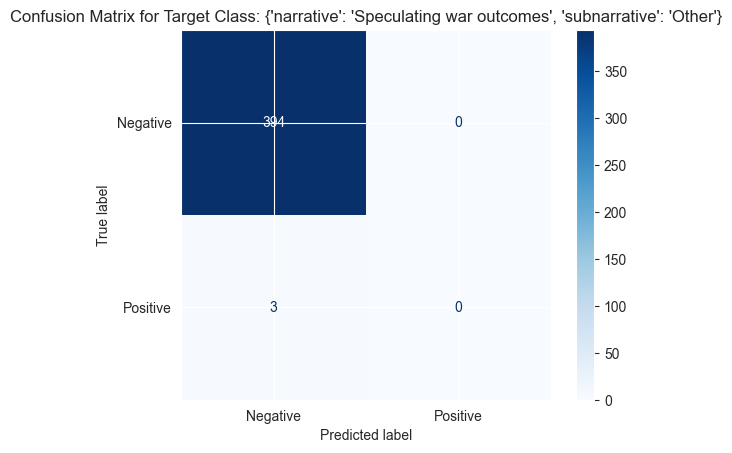

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

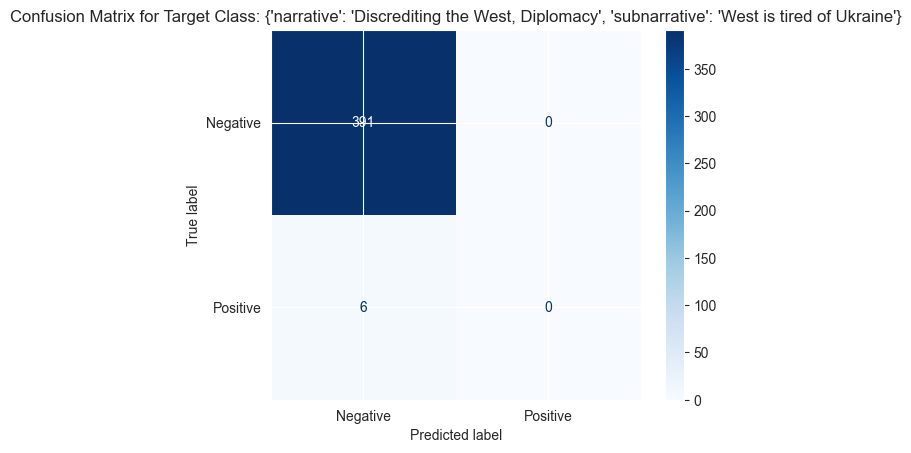

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

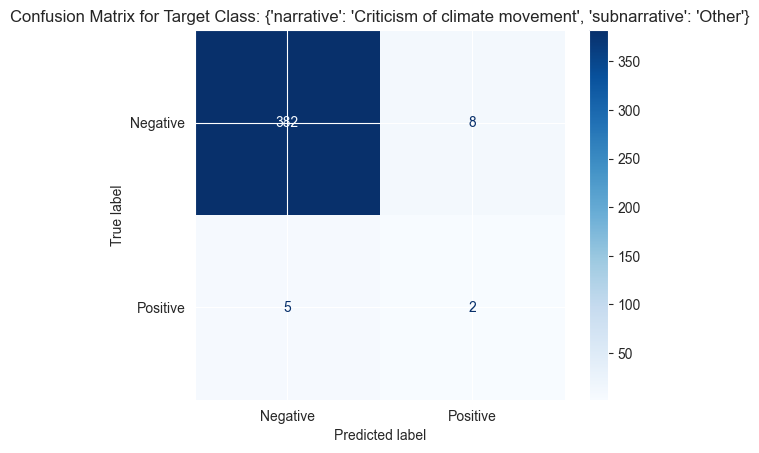

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

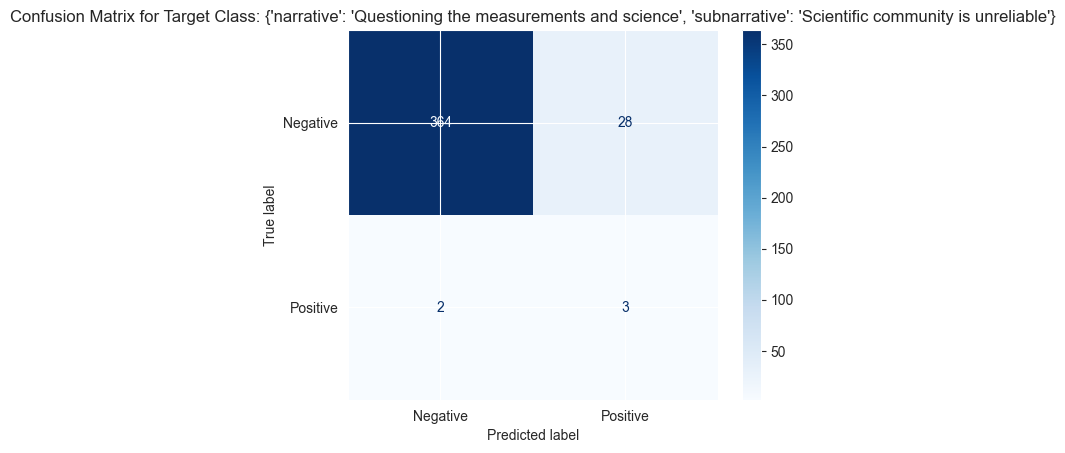

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

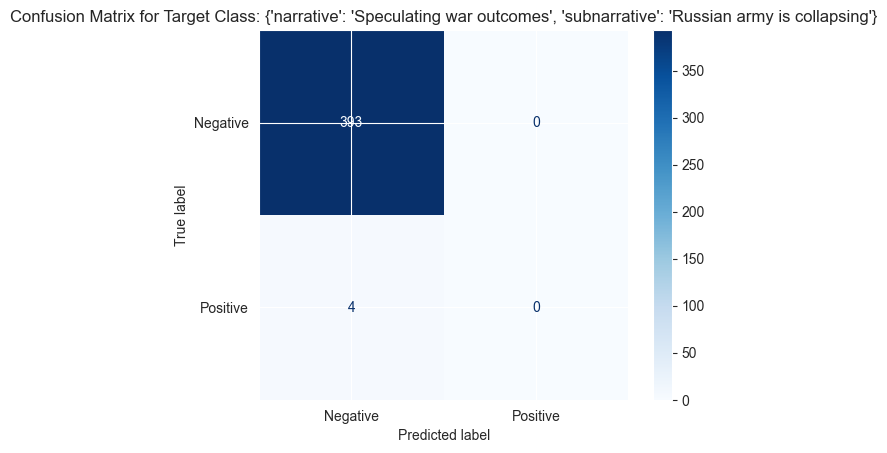

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

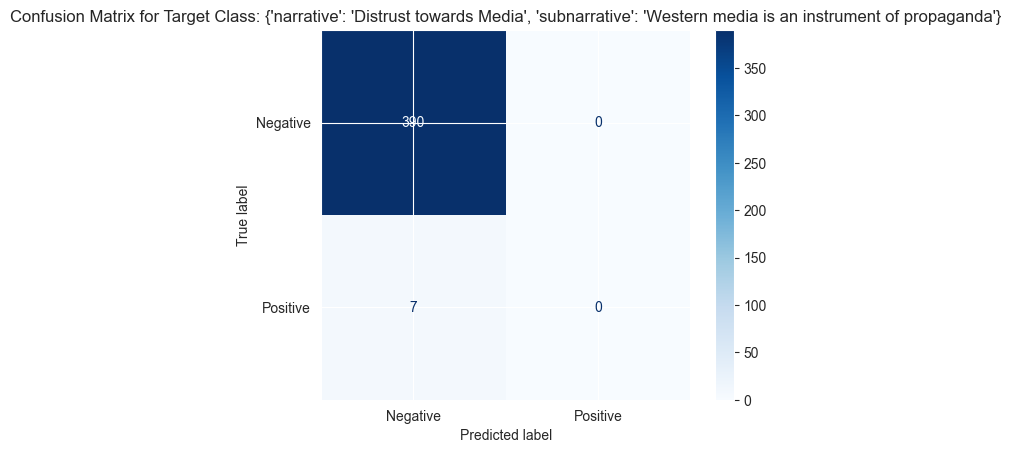

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

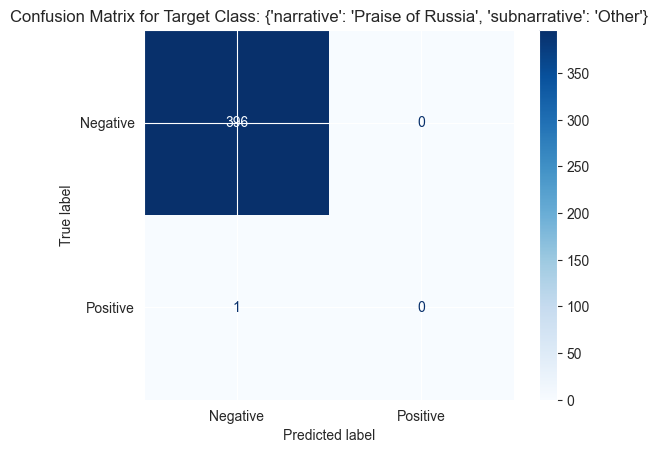

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

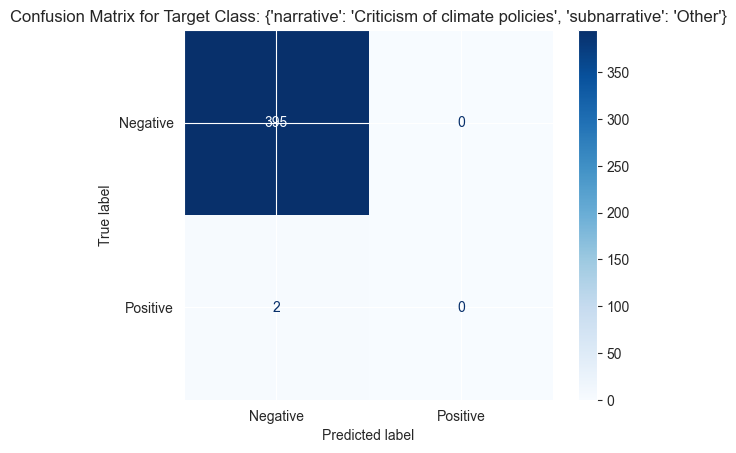

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

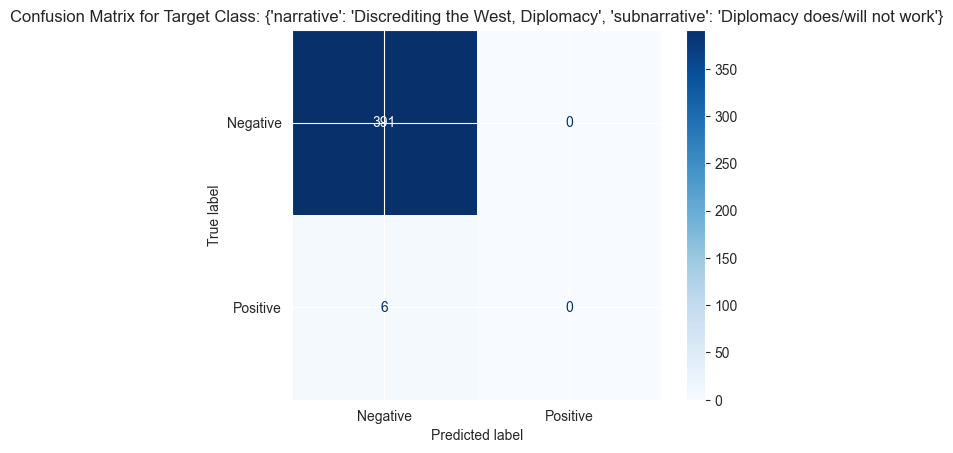

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

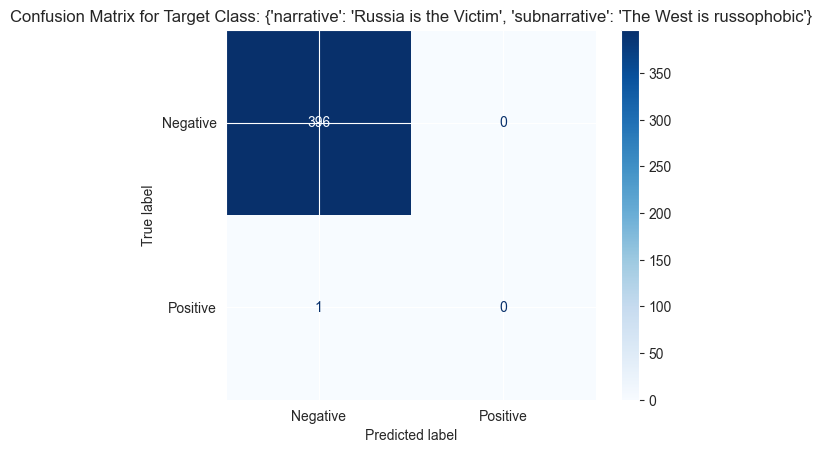

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

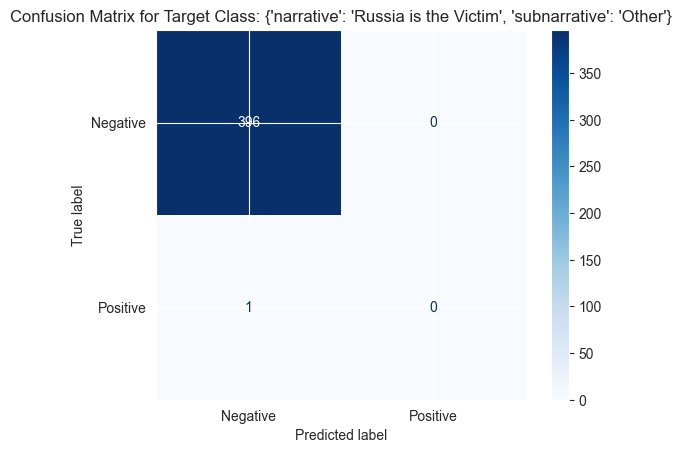

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

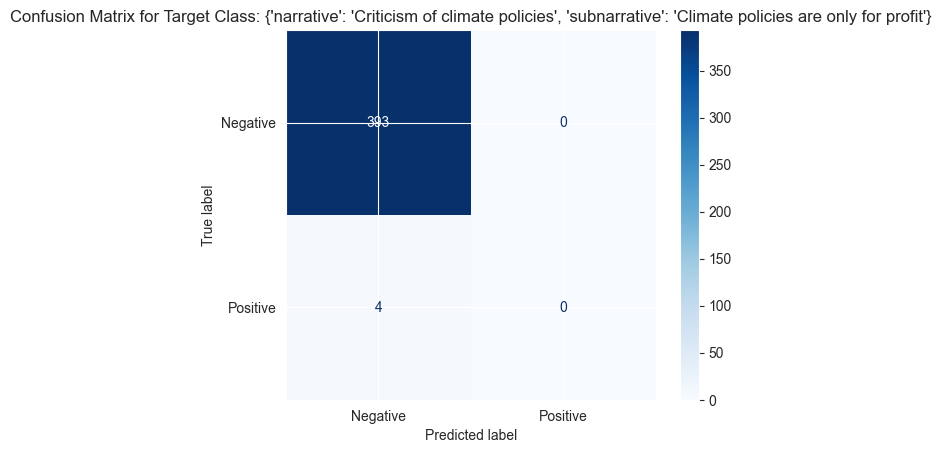

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

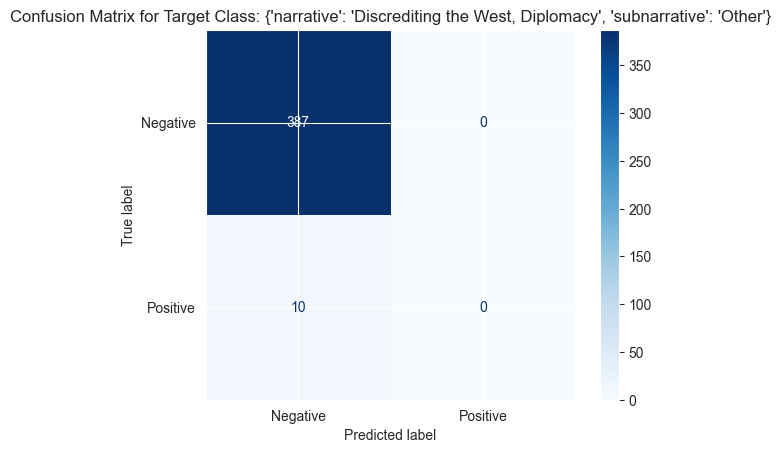

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

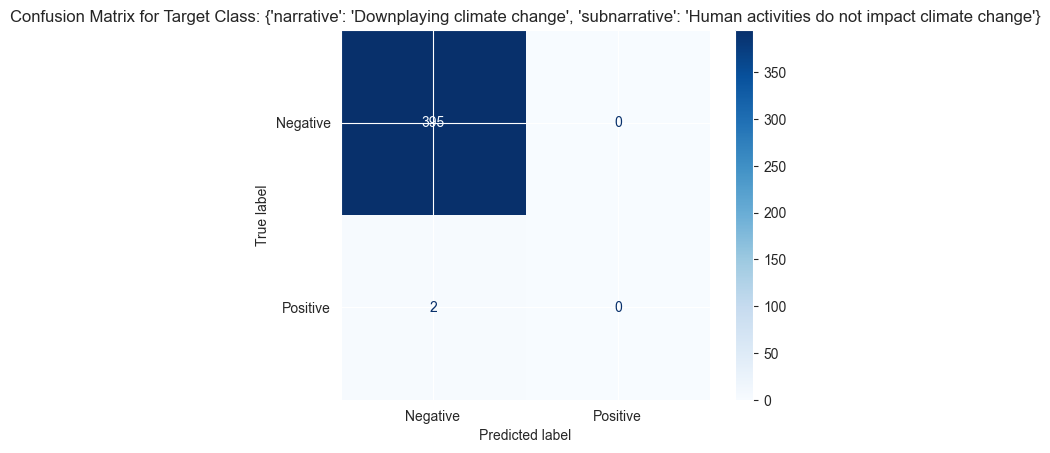

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

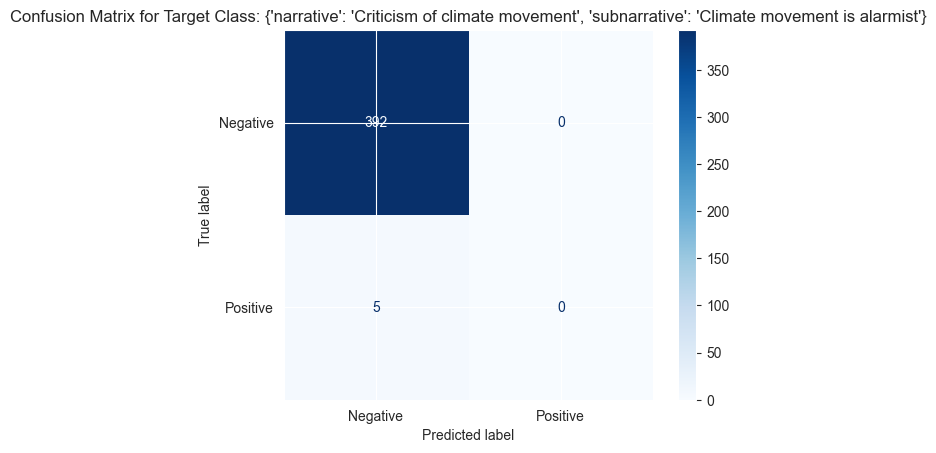

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

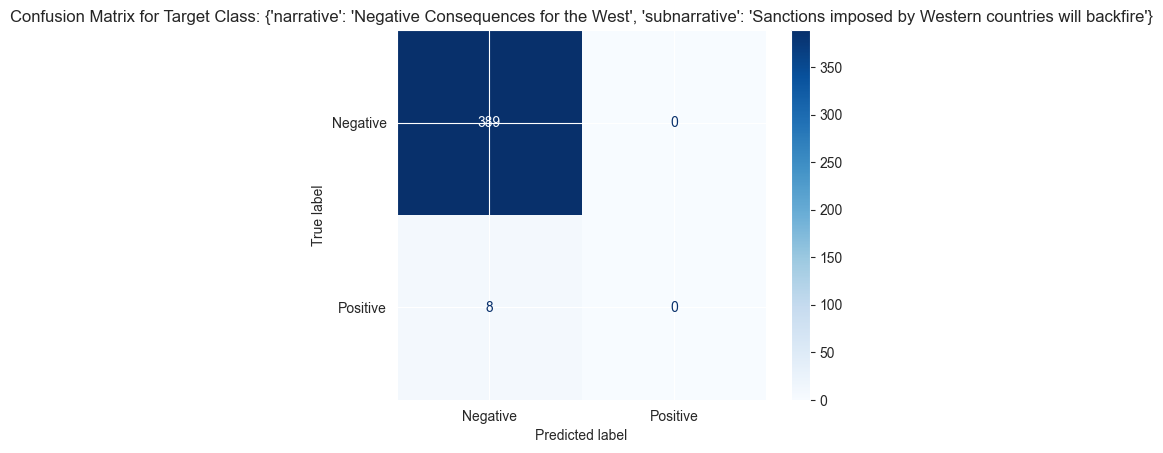

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

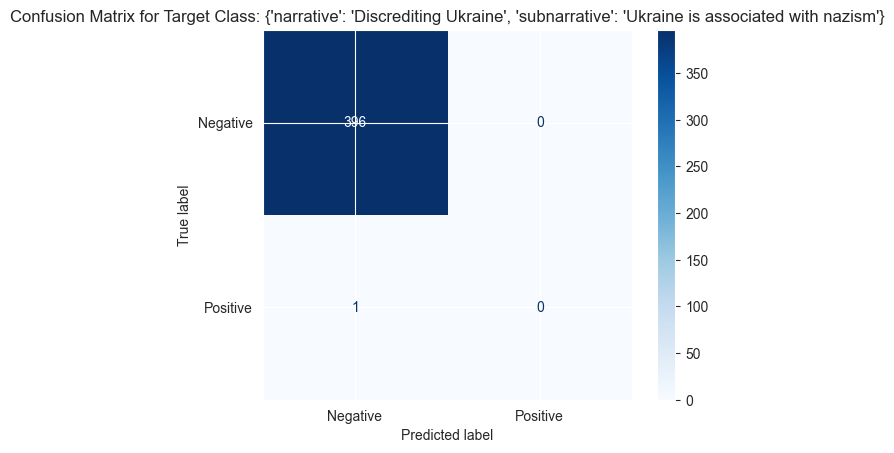

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

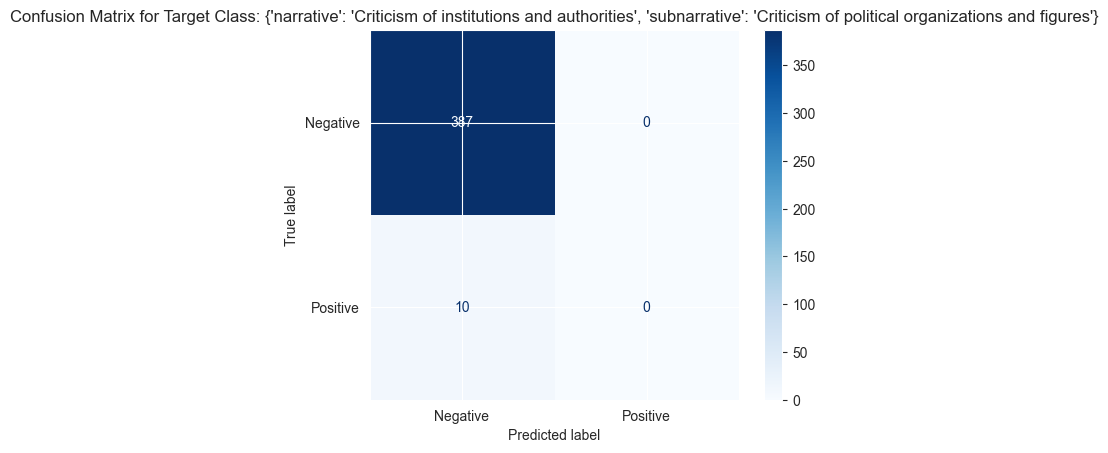

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

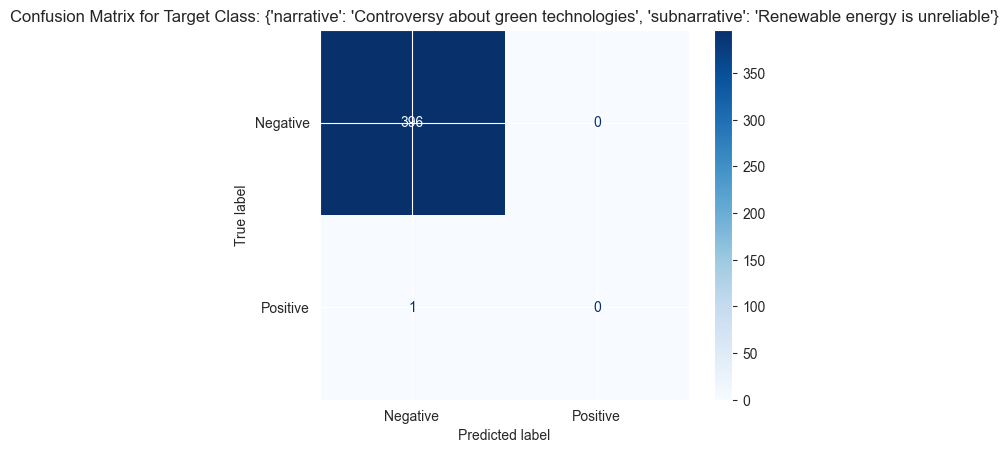

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

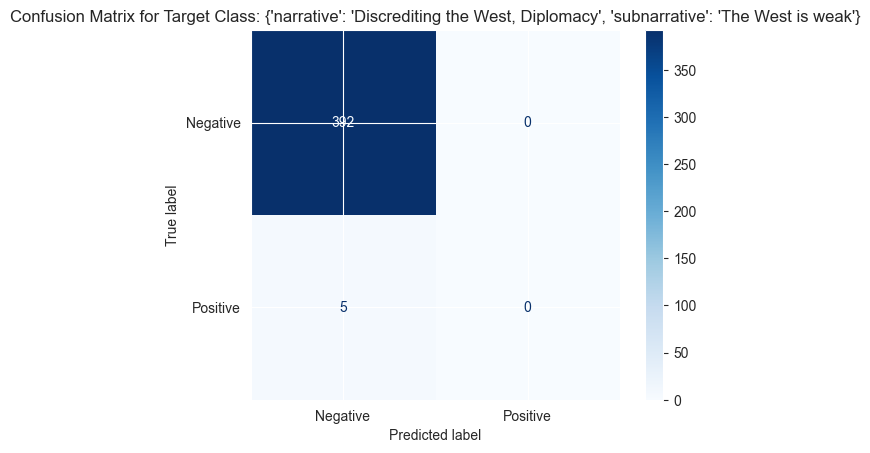

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

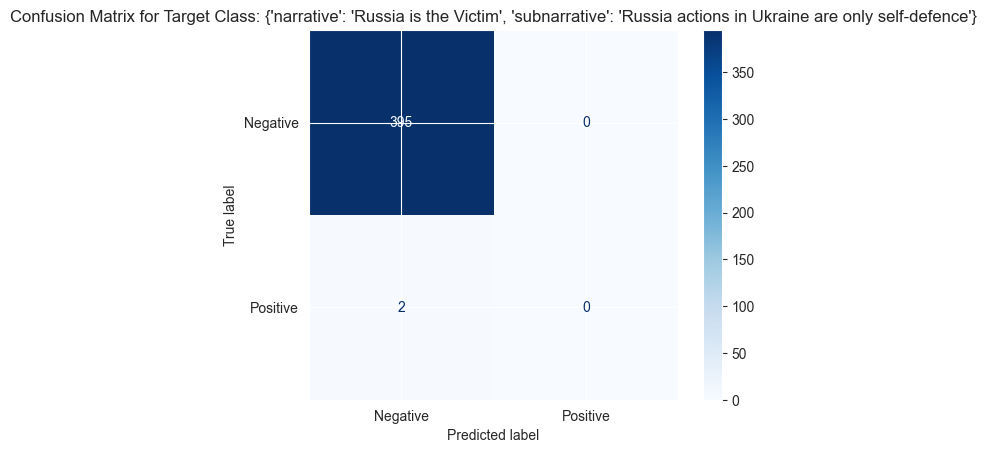

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

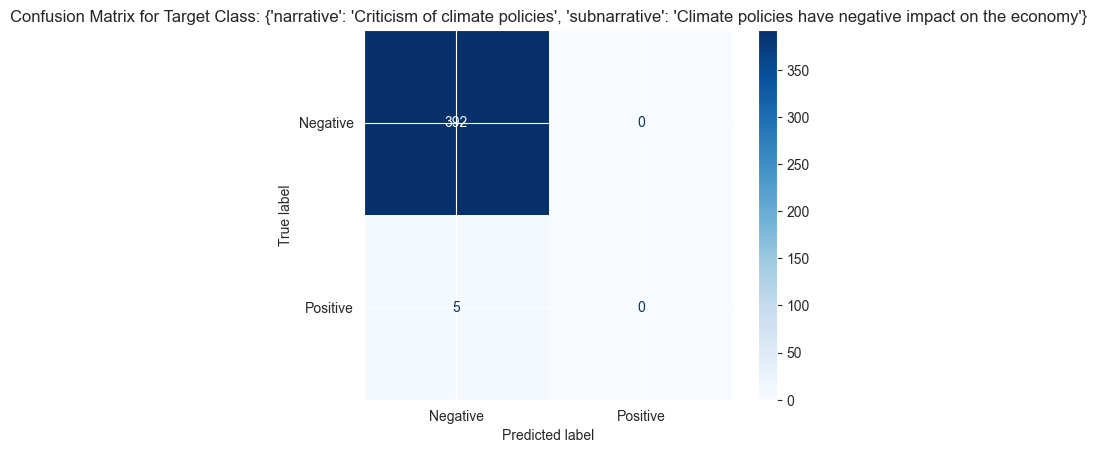

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

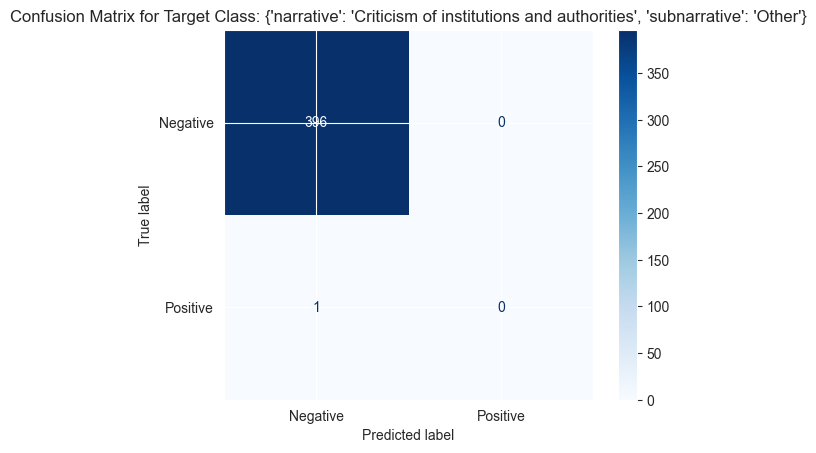

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

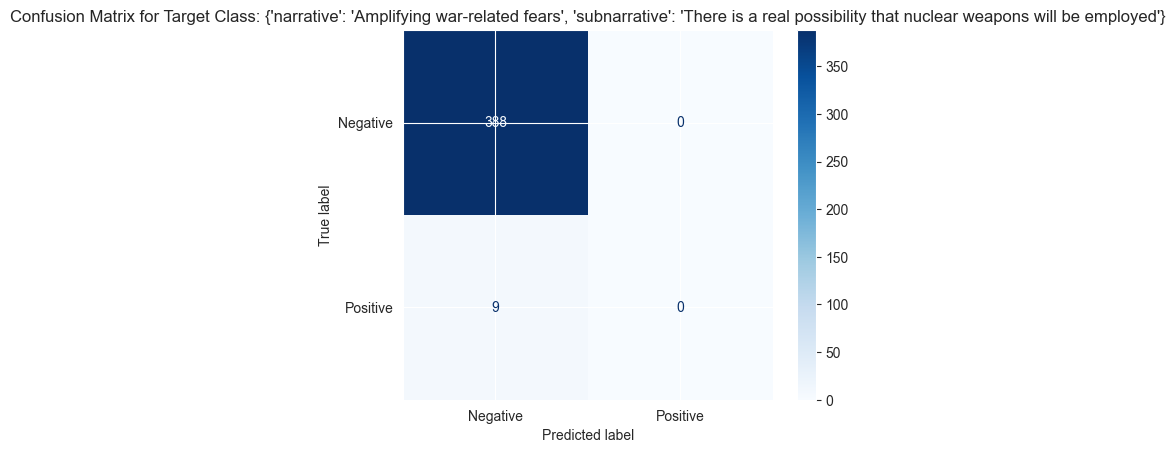

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

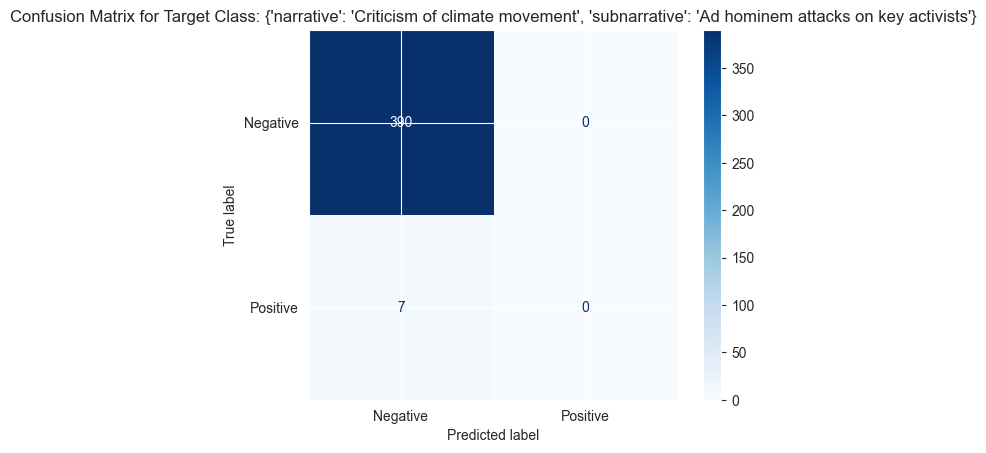

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

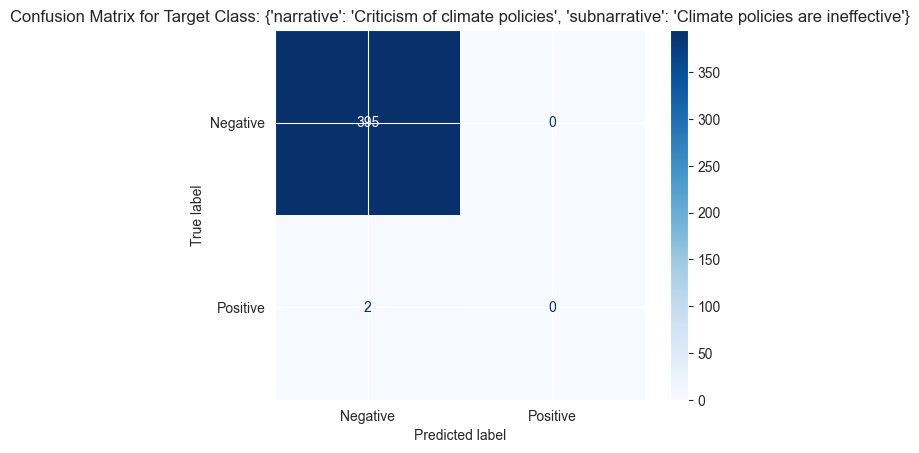

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

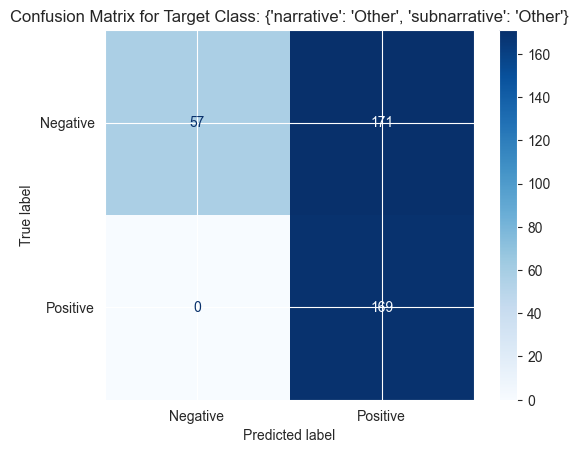

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

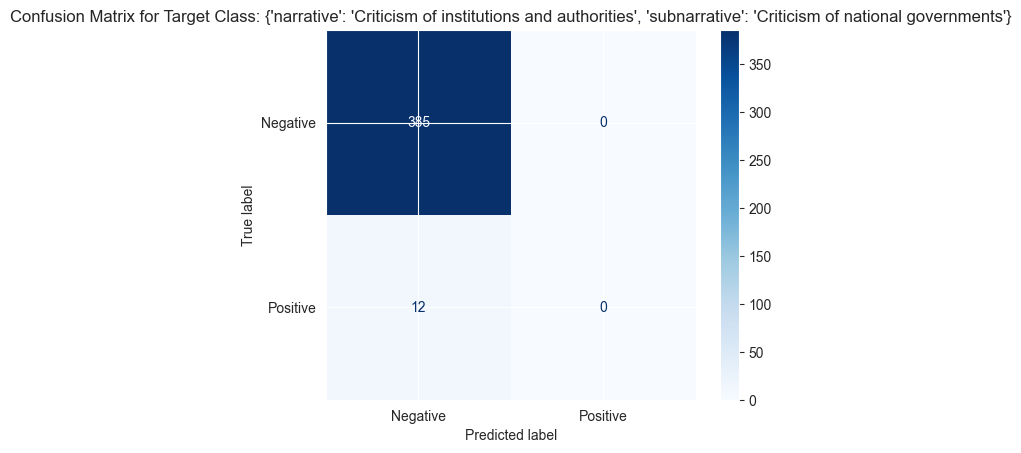

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

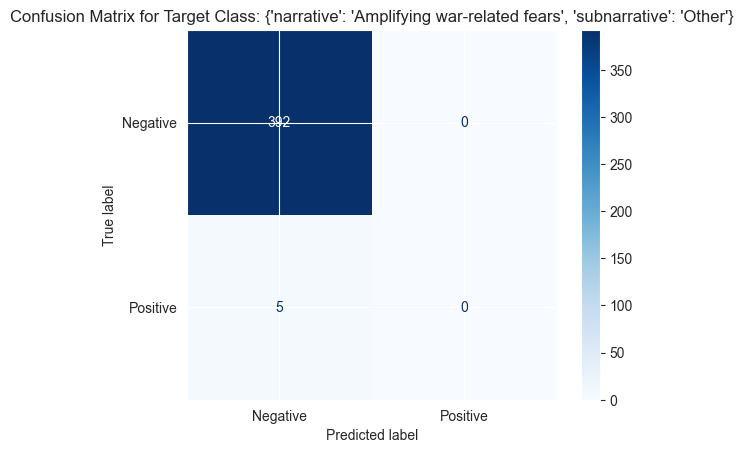

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

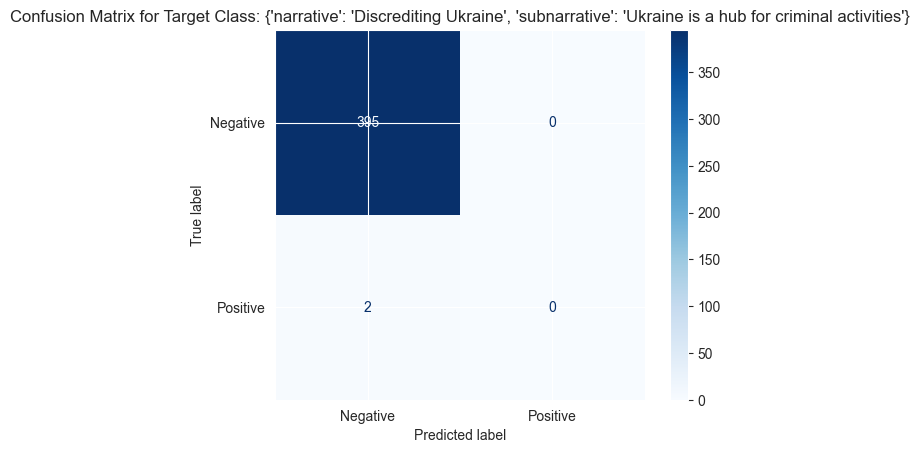

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

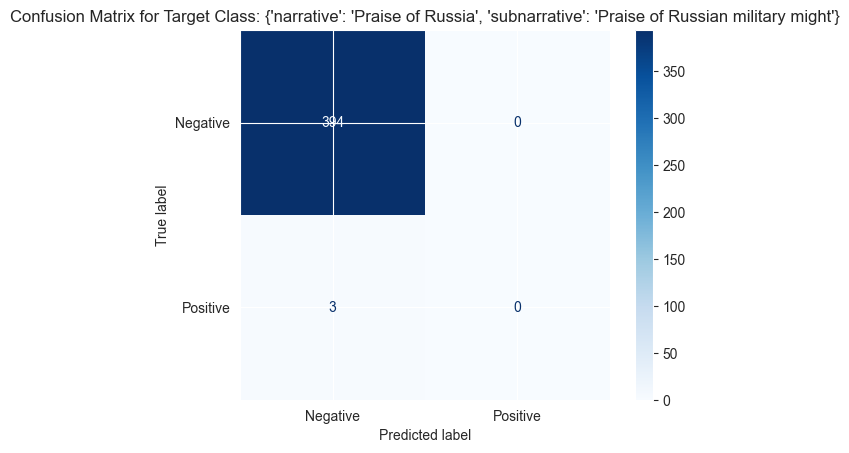

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

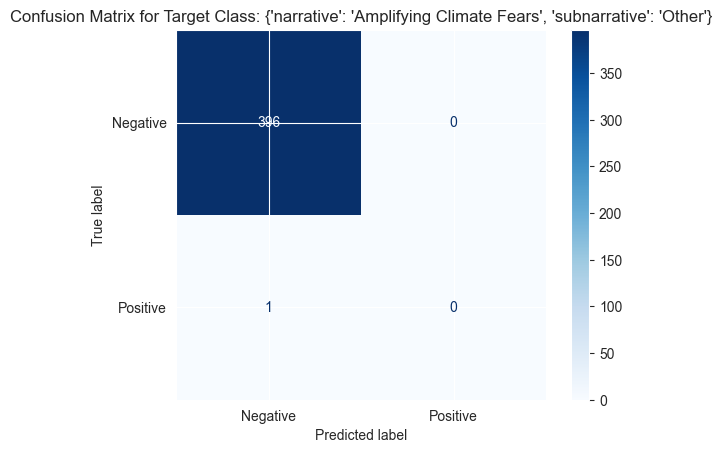

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

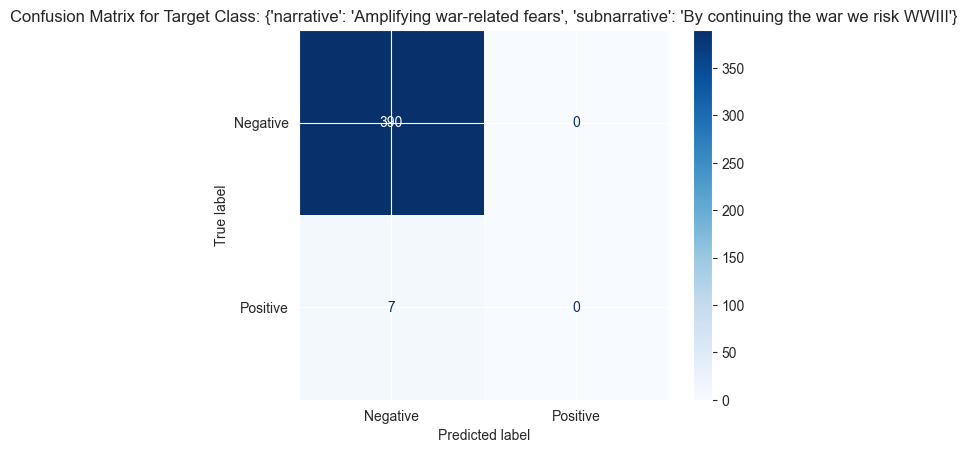

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

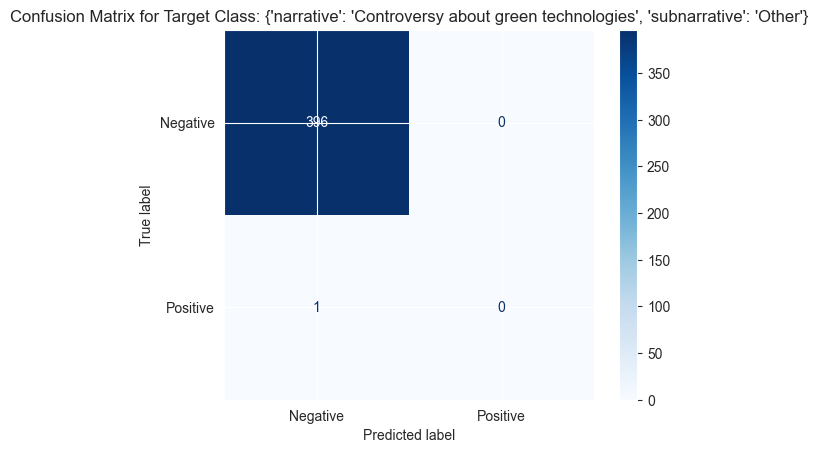

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

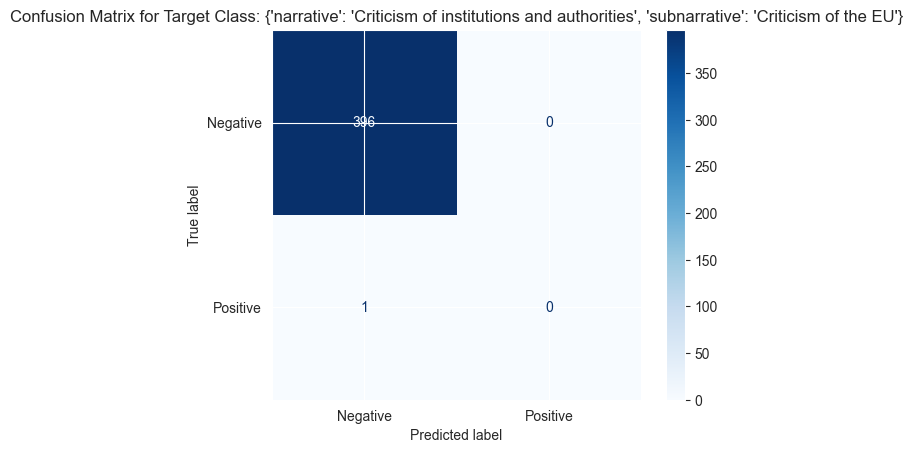

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

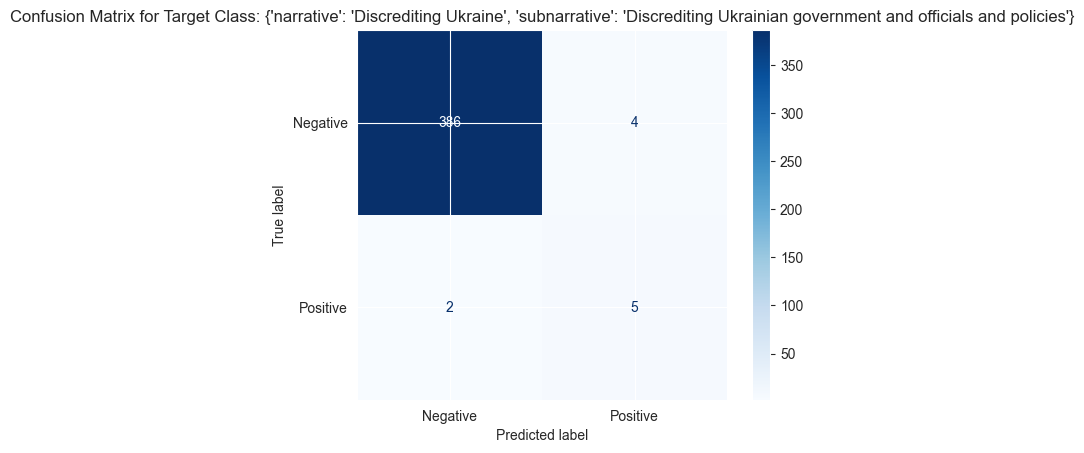

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

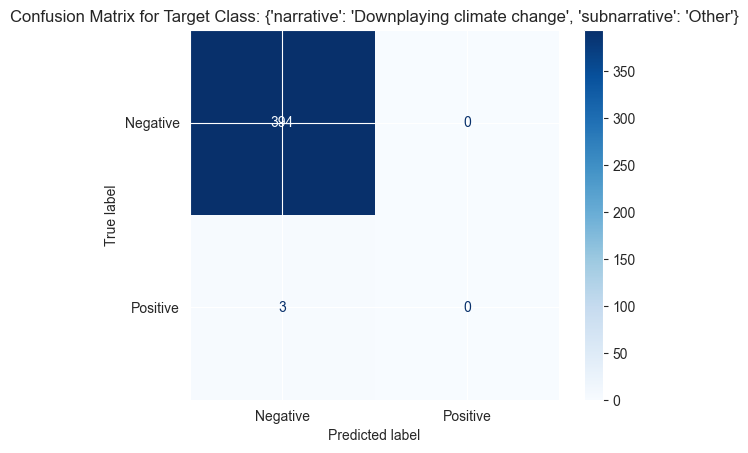

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

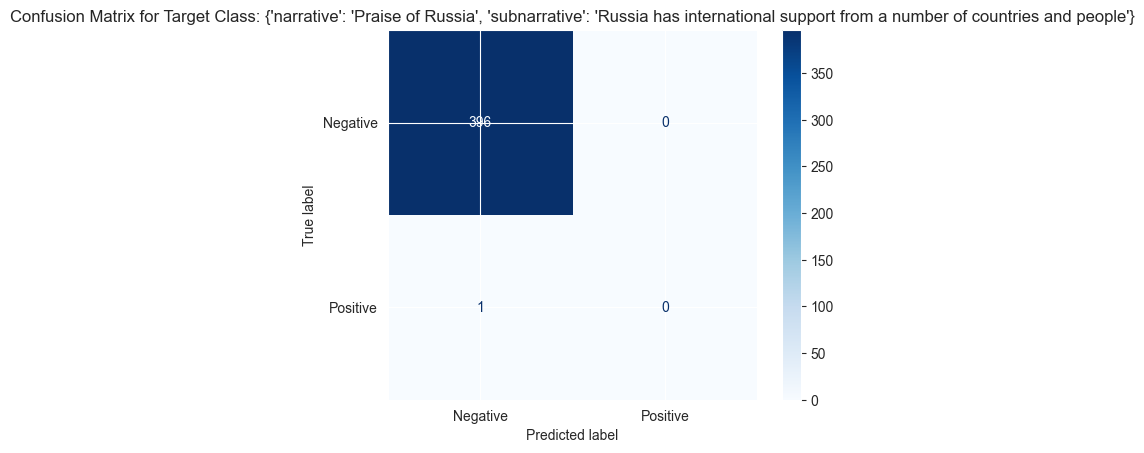

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

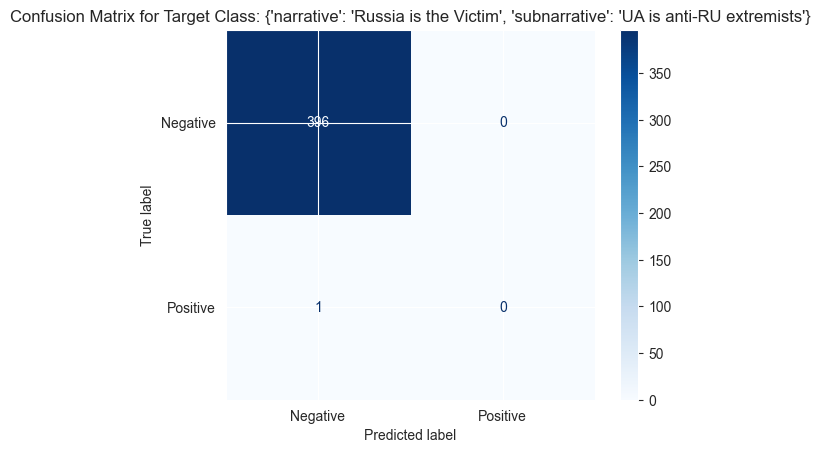

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

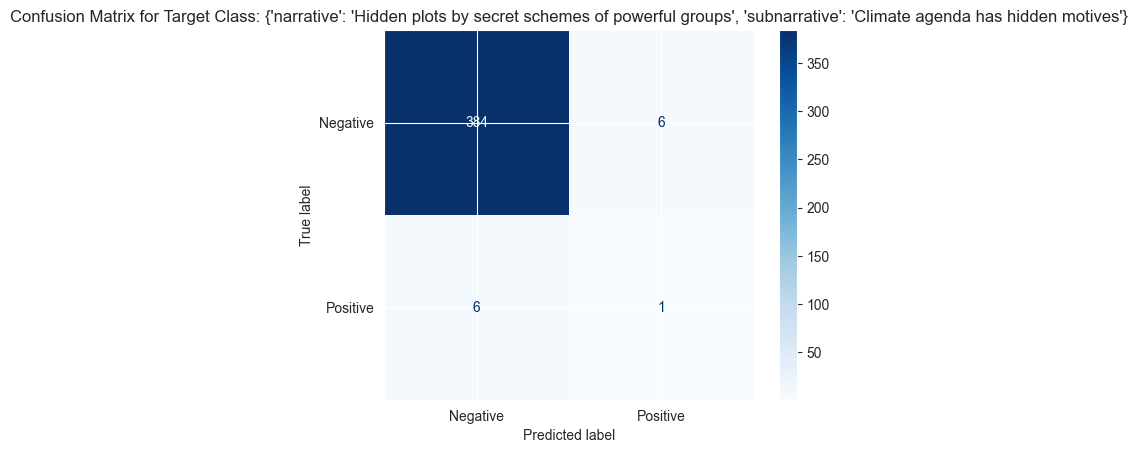

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

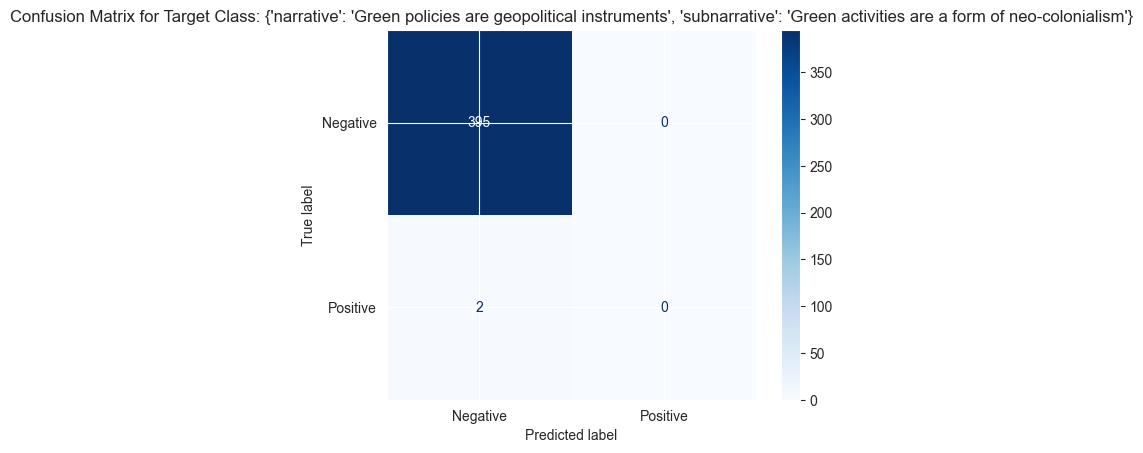

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

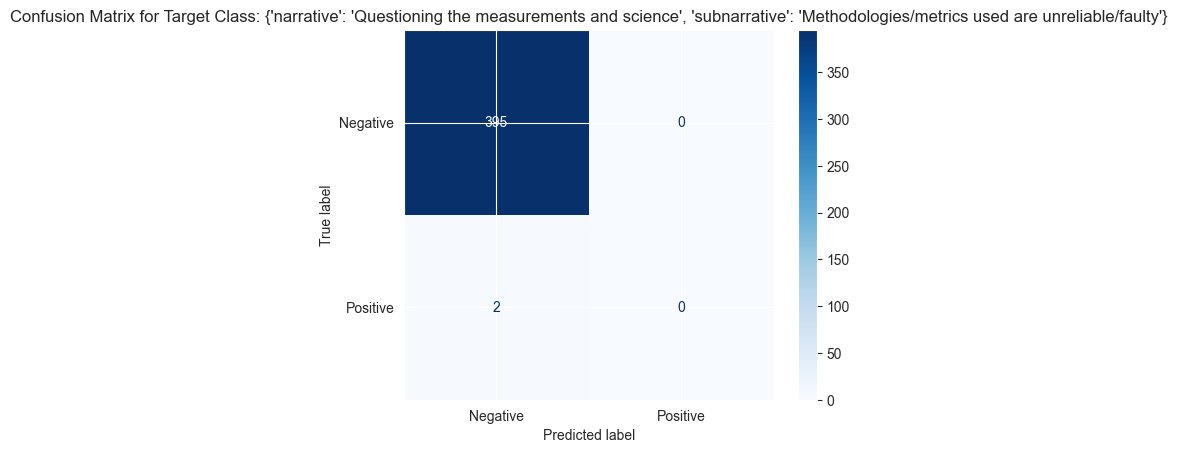

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

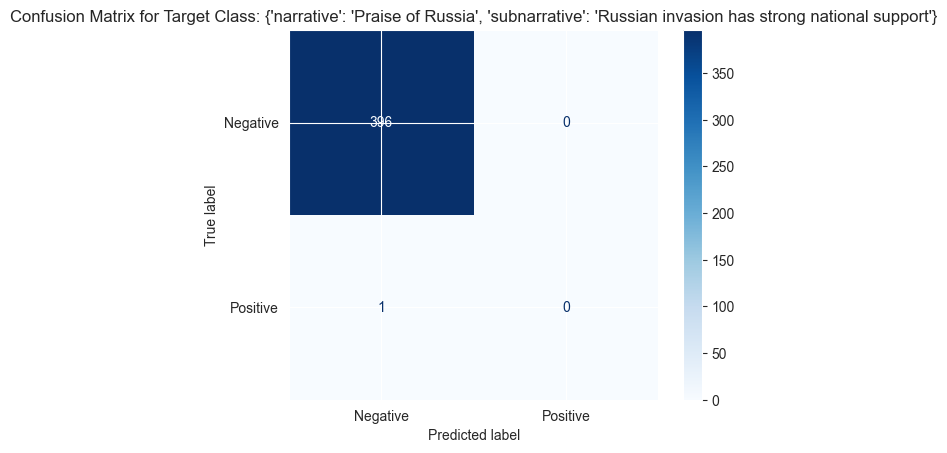

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

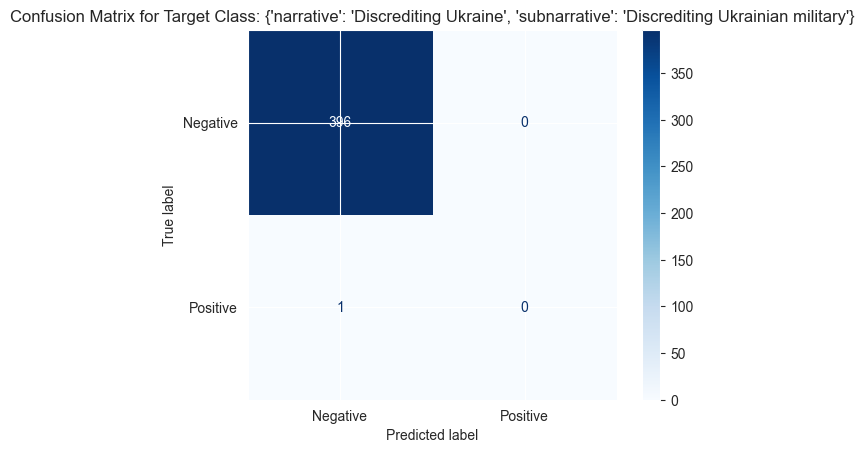

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

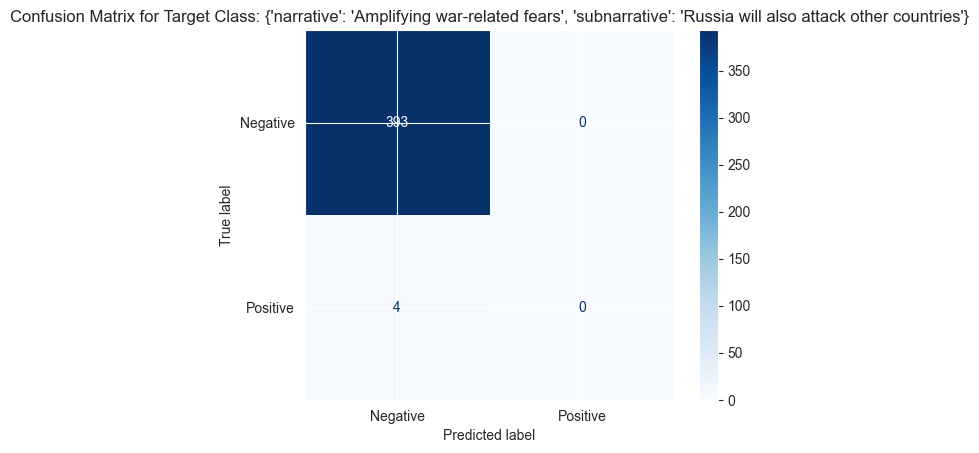

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

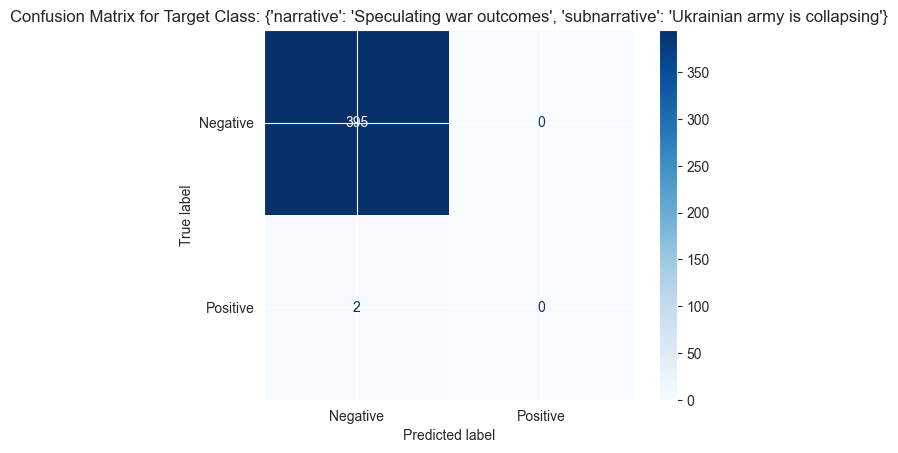

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

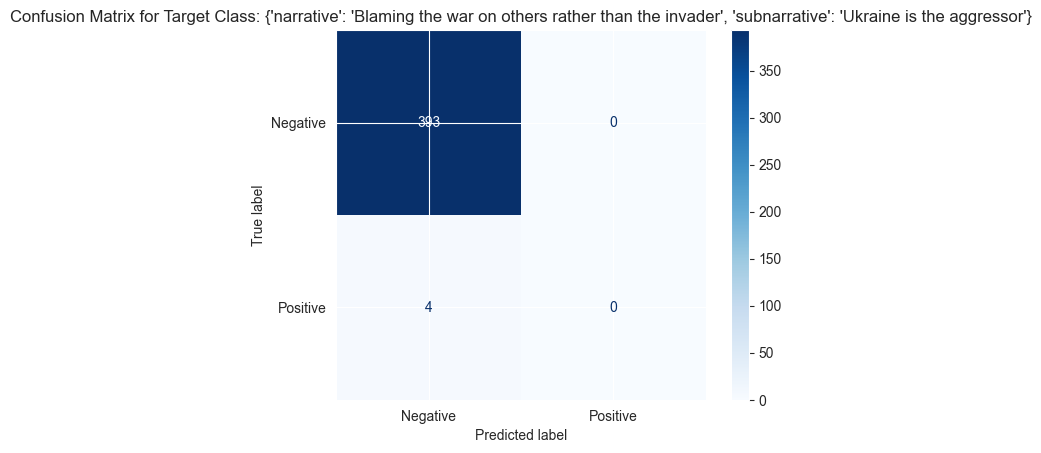

C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['True Positives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dataset['False Negatives'] = english_dataset.apply(
C:\Users\asus9\AppData\Local\Temp\ipykernel_23232\4253180463.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

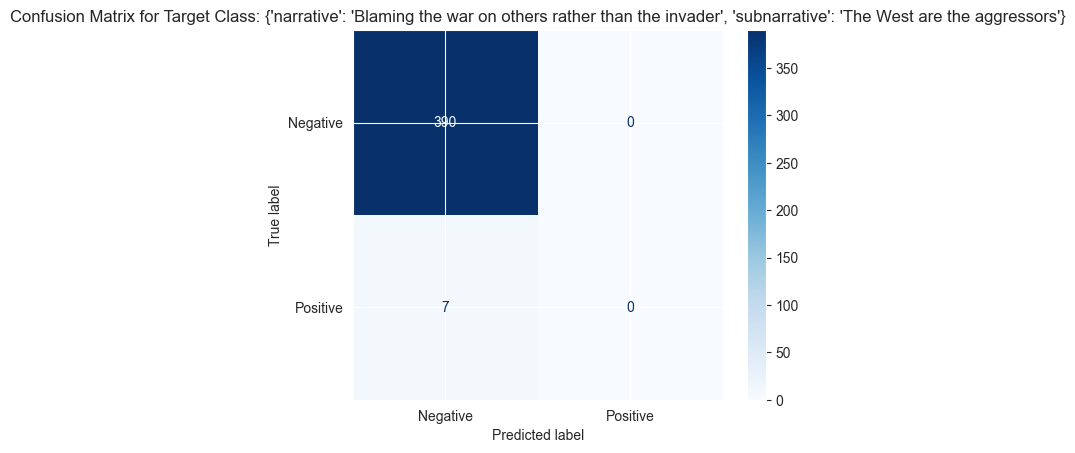

Class Summary (English Texts):
                                         target_class   TP  FN   FP   TN
0   {'narrative': 'Discrediting the West, Diplomac...    0   2    0  395
1   {'narrative': 'Discrediting Ukraine', 'subnarr...    0   2    0  395
2   {'narrative': 'Criticism of institutions and a...    0   6    0  391
3   {'narrative': 'Discrediting the West, Diplomac...    0   5    0  392
4   {'narrative': 'Hidden plots by secret schemes ...    0   5    0  392
5   {'narrative': 'Amplifying Climate Fears', 'sub...    0   5    0  392
6   {'narrative': 'Downplaying climate change', 's...    0   1    0  396
7   {'narrative': 'Hidden plots by secret schemes ...    0   7    0  390
8   {'narrative': 'Downplaying climate change', 's...    0   2    0  395
9   {'narrative': 'Overpraising the West', 'subnar...    0   4    0  393
10  {'narrative': 'Speculating war outcomes', 'sub...    0   3    0  394
11  {'narrative': 'Discrediting the West, Diplomac...    0   6    0  391
12  {'narrative': 'C

In [95]:
# Filtering on only english texts
english_dataset = dataset[dataset['language'] == 'EN']
russian_dataset = dataset[dataset['language'] == 'RU']

# Getting classes from english narratives
all_classes = set([str(narr) for narr in english_dataset['temp_narrative']])
class_summary_list = []

for target_class in all_classes:
    # Defining the targets
    target_dict = eval(target_class)

    # Defining fields for CM calculations
    english_dataset['True Positives'] = english_dataset.apply(
        lambda row: row['predicted_narrative'] == target_dict and row['temp_narrative'] == target_dict, axis=1
    )
    english_dataset['False Negatives'] = english_dataset.apply(
        lambda row: row['predicted_narrative'] != target_dict and row['temp_narrative'] == target_dict, axis=1
    )
    english_dataset['True Negatives'] = english_dataset.apply(
        lambda row: row['temp_narrative'] != target_dict and row['predicted_narrative'] != target_dict, axis=1
    )
    english_dataset['False Positives'] = english_dataset.apply(
        lambda row: row['temp_narrative'] != target_dict and row['predicted_narrative'] == target_dict, axis=1
    )

    class_summary_list.append({
        'target_class': target_class,
        'TP': english_dataset['True Positives'].sum(),
        'FN': english_dataset['False Negatives'].sum(),
        'FP': english_dataset['False Positives'].sum(),
        'TN': english_dataset['True Negatives'].sum()
    })

    # Creating CMs
    y_true = english_dataset['temp_narrative'].apply(lambda temp: temp == target_dict).astype(int)
    y_pred = english_dataset['predicted_narrative'].apply(lambda pred: pred == target_dict).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Target Class: {target_class}")
    plt.show()

# Creating class summary for faster analysis
class_summary = pd.DataFrame(class_summary_list)
print("Class Summary (English Texts):")
print(class_summary)

We will choose class *narrative: Hidden plots by secret schemes of powerful groups, subnarrative: Climate agenda has hidden motives* for the qualitative analysis of english.

We will print out the needed columns of the texts that were predicted with a different label, although they had the label mentioned above. Also, we will print news articles where the model predicted the label correctly to inspect those outputs.

In [103]:
analyzing_class = {'narrative': 'Hidden plots by secret schemes of powerful groups',
                'subnarrative': 'Climate agenda has hidden motives'}

# Filtering true positives for analyzing class
true_positive_english = english_dataset[
    (english_dataset['predicted_narrative'] == analyzing_class) &
    (english_dataset['temp_narrative'] == analyzing_class)]

# Filtering false negatives for analyzing class
false_negatives_english = english_dataset[
    (english_dataset['predicted_narrative'] != analyzing_class) &
    (english_dataset['temp_narrative'] == analyzing_class)]

print("True positive indexes:")
print(true_positive_english.index.tolist())

print("\nFalse negative indexes:")
print(false_negatives_english.index.tolist())

True positive indexes:
[153]

False negative indexes:
[66, 86, 91, 104, 293, 337]


### True positive content:

In [104]:
print(true_positive_english.loc[153, "content"])

Biden regime's war on your appliances just widened with new attack on dishwashers, under guise of 'climate change' 

 Under the guise of 'fighting climate change,' the regime has now proposed new regulations that target some of the most commonly used household appliances, including dishwashers. According to Fox Business, the Department of Energy has proposed new rules that would reduce the current limits for water and energy use in dishwashers.

The proposed rules would limit dishwashers to using 3.2 gallons of water per cycle, significantly lower than the current limit of 5 gallons, and manufacturers would need to reduce their products’ energy consumption by almost 30 percent. Even though most dishwashers available on the market already meet or exceed the current federal standards, the proposed rules have left some questioning why the Biden administration is focusing on such regulations rather than other priorities.

“Dishwashers are not the only appliances Biden’s DOE has set its sig

Reading through this news article, we can see that there are two sentences in the beginning, where the author already starts to point to the direction, the new regulations being met "under the guise of fighting 'climate change'". He also says that most dishwasers that are sold today already align with the planned regulations and that the government should focus on other topics, the meaning of the direction the text is focused to gets clear. Those two cases have probably led to the correct assumption, that there are hidden plots by powerful groups (the government).
Having the text part "under the guise" likely led to the assumption that the climate agenda has hidden motives.

We can assume that the texts the model was trained with contained words like "hidden", "climate agenda" or "regime", because those words are all contained in the news article that was predicted correctly by the model. Those words were also used to hold information which likely led the label human classify the text under that label.

Further, the sentence, that "Critics have also poked major holes in the regime´s claim [...]" also could contribute to the fact that the model predicted especially this narrative-subnarrative pair, as the governments attempt to reduce energy consumption is getting criticized.



### False negative content:

In [112]:
print(false_negatives_english.loc[104, "content"])

BBB, Trump, military exercises, predictive programming and more. 


The Boeren Burger Beweging/Farmers Citizens Movement sounds good for farmers but this party is a WEF sellout! It is NOT good news that they won the elections. Caroline van der Plas founded this movement in 2019 and is going along with the nitrogen hoax, climate change lies and biodiversity made up bullshit in order to buy up most of the farmers. She only looks at the financial side, but we all know, no farmers, no food. We are a major exporter of our products so this has an effect worldwide.

Trump is NOT on our side for those who forgot his operation warpspeed with the plan of military involvement. In his current campaign he even talks about so-called freedom cities. Do not be fooled, these are AI generated concentration camps!

Military presence is something they want us to get used to. It is not anti terrorism, it is anti citizens.

Satanism in plain sight everywhere. In our schools, in satanic performances, attacki

In [115]:
print(false_negatives_english.loc[293, "content"])

Globalist Oligarchs Wrap Up Their Conference With The Dumbest Claim Ever 

 A group of mostly unelected globalist oligarchs met in December and decided, for the third decade in a row, to stretch the truth about their efforts to fight “climate change” by cutting fossil fuel emissions.

Unelected representatives from almost 200 countries flew to Dubai in December (on their private jets) to discuss how us poors are ruining their planet by using gas stoves and the like, Reuters reported, using far more diplomatic terms. These “representatives” at Dubai’s COP28 summit decided to unite in putting an end to fossil fuels … literally the same thing they’ve said they wanted to do since the Kyoto Protocol of December 1997.

The Kyoto Protocol was one of the first annual “summits” held by unelected Bond villains who want to decide our fate. At the time, the countries present decided to cut fossil fuel use around the world, lest we be dead or drowning within a decade or two, which turned out to be 

In the first article, there are some sentences that indicate the topic *Climate Change* slightly. Especially the sentence saying "Caroline van der Plas founded [the movement]" and the following part about "nitrogen hoax", "climate change lies" and "[...] buy up most of the farmers" should lead the model to predict the actual label, as those words and sentences shall be likely been used in other news articles with that true label for training.

Nevertheless, the second part of the article starts getting religious with text parts like "Accept Jesus Christ as our saviour" or "Read the bible, fast and pray" or "Amen". Those words and especially this topic and tone of writing does not anything contribute to the true label. Thus, this drift off the climate change topic could lead the model to assume the text to belong toa different label, especially if there were some religious texts that were predicted with Other-Other or a different label, where religious topics would fit into the label.

The second article contains little Climate Change information throughout the whole text, which is understandable if one knows what kind of meetup was in Dubai and why influential people are joining it. Parts like "Globalist oligarchs met [...]" or "Unelected Bond villains who want to decide our fate." and "Mega Rich Elite [...]" tries to frame the politicians as a powerful group in a pejorative way.
Still, the model did not predict this news article as the true label. One reason for that could be, that the article is written in a sarcastic and pejorative way, which could lead the model to predict the label Other-Other, because the climate change content of the text is a bit hidden in political and social concepts that need to be understood.